# Height and Weight Prediction Activity

Contoso Data Systems is creating a new product to predict the height or weight of a person.

In this project, you’ll use linear regression models to predict the height or weight of a person.

## About the data: 

Human Height and Weight are mostly heritable, but lifestyles, diet, health and environmental factors also play a role in determining an individual's physical characteristics. The dataset below contains 10,000 synthetic records of human heights and weights of 18 years old children. These data were simulated based on a 1993 by a Growth Survey of 10,000 children from birth to 18 years of age recruited from Maternal and Child Health Centres (MCHC) and schools and were used to develop Hong Kong's current growth charts for weight, height, weight-for-age, weight-for-height and body mass index (BMI).

## Linear Regression

Linear regression is a statistical method that summarizes the relationship between two quantitative data and defines uncertain relationships between two variables.

`y = a.x + b` – This equation defines a linear regression, 

where y is a dependent variable, x is an independent variable, and b is a constant.

In the real world, data will not fit this equation. The linear regression equation tries to predict the approximate relationship between the dependent and independent variables.

## The activity: Data Visualization

We want to make data accessible to people so that they can draw their own conclusions from the data, these conclusions are drawn from the expertise that we as data scientists need to have in the subject we are studying. We refer this as domain expertise and it is incredibly important for us to know something about the data before we can begin to create models and experiments.

In this activity we will use two common forms of exploratory data visualizations: single column visualizations and two-column visualizations. As you may have inferred from the names, the single column visualization is used to show the shape of your data and the two-column highlights the relationship between two variables in a dataset.

Some of these shapes we will see in the single column visualizations are idealized shapes, we call these shapes distributions. Distributions are standard patterns that statisticians have used for years to describe data. When you find a distribution in your data, or when you find one of these shapes, you can make some broad inferences about your data. 

Let's  begin by loading the data and the tools that we will use to view the data in Python. In this case numpy and pandas. Even though this data only has three fields. It's actually a fairly complex and interesting dataset that we can use to illustrate many of the ideas we use as data scientists on a daily basis.

*Note from Sarah to Dan*  
Above you say `In the real world, data will not fit this equation.` - can you briefly explain why?  
Above you say `it is incredibly important for us to know something about the data before we can begin to create models and experiments.` - can you briefly explain why? For example, `we will need to make decisions about how to fill null values, when to drop certain columns of data, and what data to take into account when making predicitons, and without that domain expertise we might end up answering the wrong question or accidentally skewing results`  
I liked your paragraph above about "Some of these shapres will....", can you add a similar paragraph for two-column visualizations?

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from lmfit.models import LorentzianModel

df = pd.DataFrame(pd.read_csv('Data/01_heights_weights_genders.csv', index_col=[0]))
df.head()

,Height,Weight
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Male to Female
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4+ KB


# Looking at different plots

As a data scientist you must first get to know your domain and the data that is being collected within that field. Let's do a deep dive and display some plots of the data just so that we can see how they look. The results of this type of review are unknown and we can only look for nuances and things that we may have not thought about before.

As we look at different plots, we train ourselves to spot anomalies and other features that we may not have noticed if we were to just do the most basic review of the data.

In [3]:
# Use a '?' question mark after a keyword and explore what each function does below:
# It is always a good idea to review the documentation before you execute a command
df.plot?

*Notes from Sarah to Dan*  
I think the next section is formatted incorrectly?  
Can you also better explain what learners are seeing?

## Here is part the output of `df.plot?`, notice the types of plots you can create:

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x10658fa90>
File:           /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

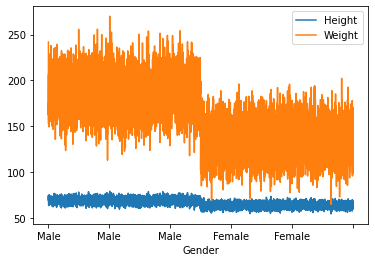

In [4]:
# Now let's run the code.
df.plot()

Let’s get started by just visualizing the heights and weights data that we’ve been working with so far. We chosen this dataset because it can be used to illustrate many of the tasks that we use daily when working with data.

The most typical single-column visualization technique that people use is the histogram. In a histogram, you divide your data set into bins and then count the number of entries in your data that fall into each of the bins.

In [5]:
# Let's explore the the histogram a bit more by looking at the built-in documentation.
df.hist?

*Notes from Sarah to Dan*  
Can you explain what they are seeing after running that cell?  
For the next cell, can you briefly describe bins before continuing?  
For the next cell, you say `One way to check this is to try using several different bin levels.` - can you specify what "this" is?  


## Setting bins and smoothing

How many bins should we use? Try using just one bin. You'll notice that with one (1) bin you will not get any distribution it will just be a solid plot.  Most of the entries are in the middle of your data, near the mean and median height. 

But there’s a danger that this shape is an illusion caused by the type of histogram we’re using. One way to check this is to try using several different bin levels. This is something you should always keep in mind when working with histograms: the number of bins you use impose external structure on your data at the same time that they reveal internal structure in your data. The patterns you find, even when they’re real, can go away very easily if you use the wrong settings for building a histogram. 

Try using five (5) bins and the solid structure dissappears, but we still have a peak like a bell curve. When we use too few bins like this, we run into the risk of undersmoothing our plot. Conversely when we use too many, we oversmooth. 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x12c1fd0f0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x12c1c68d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x12c38b9e8>]]


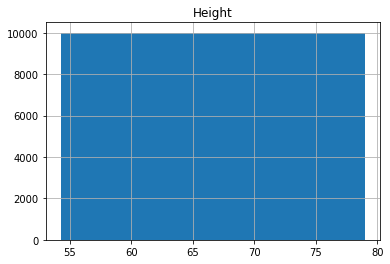

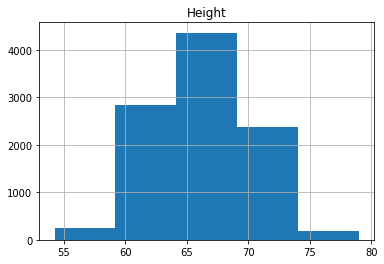

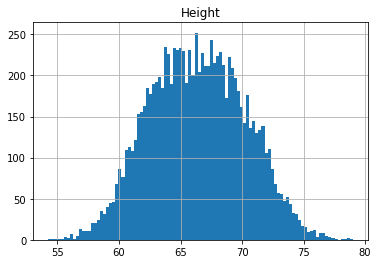

In [6]:
# Way undersmoothed
print(df.hist(column='Height', bins=1))
print(df.hist(column='Height', bins=5))

# Oversmoothed?
print(df.hist(column='Height', bins=100))

## Using Density Plots or KDE 



*Notes from Sarah to Dan*  
Are you missing a cell here?  
Also, can you summarize the histograms they just made?

# Examing the Relationship between Height and Weight

After looking at some histograms, we can look at how height and weight look like when plotted together. We can expect some sort of linear relationship there. Intuitively we know that as a person gets taller their weight will increase. 

*Notes from Sarah to Dan*  
Can you explain the next cell?

In [7]:
model = LorentzianModel()
params = model.guess(df['Weight'], x=df['Height'])
result = model.fit(df['Weight'], params, x=df['Height'])

Learn about non-linear least squares minimization models
https://lmfit.github.io/lmfit-py/builtin_models.html


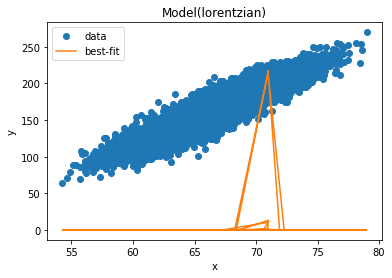

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 10000
    # variables        = 3
    chi-square         = 2.7085e+08
    reduced chi-square = 27092.8121
    Akaike info crit   = 102073.237
    Bayesian info crit = 102094.868
##  Warning: uncertainties could not be estimated:
    sigma:      at boundary
[[Variables]]
    amplitude:  1.0226e+11 (init = -2609.691)
    center:     71.0082174 (init = 69.68376)
    sigma:      0.00000000 (init = 0)
    fwhm:       0.00000000 == '2.0000000*sigma'
    height:     1.4659e+26 == '0.3183099*amplitude/max(2.220446049250313e-16, sigma)'


In [8]:
result.plot_fit()
plt.show()

print(result.fit_report())

We can see there is a strong linear relationship here.

*Notes from Sarah to Dan*  
Please add more explanation to the graph.

# How do height and weight depend on gender?
Intuitively we do recognize a relationship. Let's use pandas to discover

In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
hgt_wgt_gender=df.groupby('Gender')

In [11]:
print(hgt_wgt_gender.describe())

        Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200

Using `groupby` and `describe` we can examine quantiles for height and weight basd on gender all at once.

*Notes from Sarah to Dan*  
Could you provide a couple more sentences explanation here?

## What is a Density Plot?

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).

*Notes from Sarah to Dan*  
Can you provide an introduction to the cells you're about to run?

In [23]:
height = df['Height']

In [24]:
height.head()

Gender
Male    73.847017
Male    68.781904
Male    74.110105
Male    71.730978
Male    69.881796
Name: Height, dtype: float64

In [25]:
m_hgt=height.loc['Male']

In [26]:
f_hgt=height.loc['Female']

In [27]:
print(m_hgt)
print(f_hgt)

Gender
Male    73.847017
Male    68.781904
Male    74.110105
Male    71.730978
Male    69.881796
          ...    
Male    68.860062
Male    68.973423
Male    67.013795
Male    71.557718
Male    70.351880
Name: Height, Length: 5000, dtype: float64
Gender
Female    58.910732
Female    65.230013
Female    63.369004
Female    64.479997
Female    61.793096
            ...    
Female    66.172652
Female    67.067155
Female    63.867992
Female    69.034243
Female    61.944246
Name: Height, Length: 5000, dtype: float64


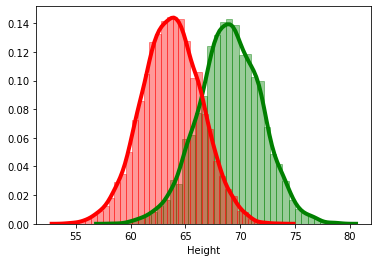

In [44]:
import seaborn as sns
sns.distplot(m_hgt, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})
sns.distplot(f_hgt, hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

For men there is a little bump around 6 feet. (Maybe the measurers generously rounded up the guys who are 5'11.5".) However the distributions look pretty close. Comparing the plots makes it pretty clear. It looks like these are two normal distributions with different means. We can check a Q-Q plot.

*Notes from Sarah to Dan*  
Since we haven't introduced Q-Q plot, maybe just a sentence, even "described in the next section, to..."

## Q-Q Plots

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.[1] First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x. Q–Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.

A Q–Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions. Q–Q plots can be used to compare collections of data, or theoretical distributions. The use of Q–Q plots to compare two samples of data can be viewed as a non-parametric approach to comparing their underlying distributions. A Q–Q plot is generally a more powerful approach to do this than the common technique of comparing histograms of the two samples, but requires more skill to interpret. Q–Q plots are commonly used to compare a data set to a theoretical model.[2][3] This can provide an assessment of "goodness of fit" that is graphical, rather than reducing to a numerical summary. Q–Q plots are also used to compare two theoretical distributions to each other.[4] Since Q–Q plots compare distributions, there is no need for the values to be observed as pairs, as in a scatter plot, or even for the numbers of values in the two groups being compared to be equal.

*Notes from Sarah to Dan*  
Again, just a quick sentence intro/summary to code

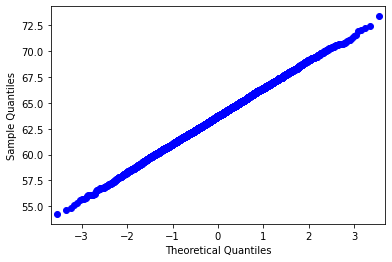

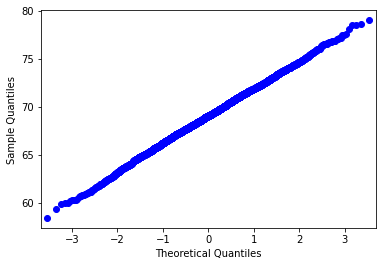

In [47]:
import statsmodels.api as sm
import pylab

sm.qqplot(f_hgt)
sm.qqplot(m_hgt)
pylab.show()

These distributions appear to be normal.

*Notes from Sarah to Dan*  
Define "normal"

## Relationship between height and weight by gender

We saw earlier that there is a good linear fit of weight versus height, but the distributions of these vary by gender. It's natural to ask if there is a significant difference between the linear fits. First plot the points colored by gender.

In [53]:
men = df.loc['Male']

In [54]:
women = df.loc['Female']

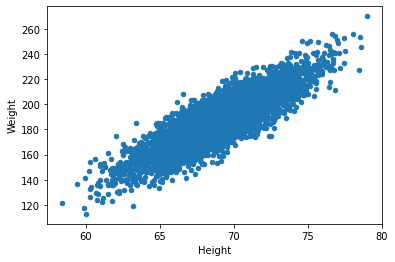

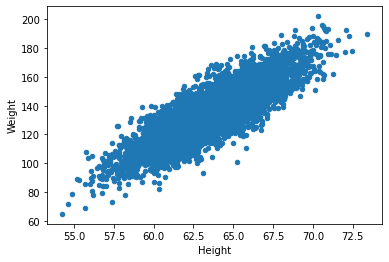

In [56]:
men.plot.scatter(x='Height', y='Weight')
women.plot.scatter(x='Height', y='Weight')

It appears that the slopes of these plots are very similar.

*Notes from Sarah to Dan*  
Slightly more description here, and a wrap up of the project.